<a href="https://colab.research.google.com/github/habibur-rahman-swe/DeepLearningWithKeras/blob/main/DeepLearningWithKeras_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
path = "/content/sample_data/california_housing_test.csv"

In [ ]:
train_labels = []
train_samples = []

In [ ]:
for i in range(50):
  # The ~5% of younger individuals who did experience side effects
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  # The ~5% of older individuals who did not experience side effects
  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  # The 95% of younger individuals who did not experience side effects
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # The 95% of older individuals who did experience side effects
  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)

In [ ]:
print(len(train_samples),train_samples[:5])
print(len(train_labels),train_labels[:5])

2100 [46, 65, 48, 99, 60]
2100 [1, 0, 1, 0, 1]


In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
# prompt: how to see the train_saples length

len(train_samples)


2100

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))
scaled_train_samples[:5]

array([[0.82758621],
       [0.40229885],
       [1.        ],
       [0.49425287],
       [0.93103448]])

In [ ]:
# Creating an Artificial nural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                32        
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, shuffle=True, epochs=30, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.7101 - accuracy: 0.3799 - val_loss: 0.6831 - val_accuracy: 0.4952 - 1s/epoch - 7ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6640 - accuracy: 0.5360 - val_loss: 0.6486 - val_accuracy: 0.5429 - 306ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6306 - accuracy: 0.6053 - val_loss: 0.6132 - val_accuracy: 0.6238 - 356ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.5852 - accuracy: 0.7217 - val_loss: 0.5648 - val_accuracy: 0.7762 - 357ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5466 - accuracy: 0.7873 - val_loss: 0.5310 - val_accuracy: 0.8095 - 306ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5150 - accuracy: 0.8079 - val_loss: 0.5007 - val_accuracy: 0.8190 - 379ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.4855 - accuracy: 0.8270 - val_loss: 0.4710 - val_accuracy: 0.8476 - 365ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4574 - accuracy: 0.8508 - val_loss: 0.4433 - val_accuracy: 0.8667 - 312ms/epoch - 2ms/step
Epo

In [ ]:
test_labels = []
test_samples = []

In [ ]:
for i in range(50):
  # The ~5% of younger individuals who did experience side effects
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(1)

  # The ~5% of older individuals who did not experience side effects
  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  # The 95% of younger individuals who did not experience side effects
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # The 95% of older individuals who did experience side effects
  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(1)


test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.transform(test_samples.reshape(-1, 1))

In [ ]:
predictions = model.predict(
    x = scaled_test_samples,
    batch_size = 10,
    verbose = 0
)

In [ ]:
print(predictions[:5])

[[0.38269207 0.6173079 ]
 [0.7199841  0.28001583]
 [0.13008238 0.8699175 ]
 [0.9552119  0.04478807]
 [0.0344139  0.965586  ]]


In [ ]:
# roounding np prediction to get 0 or 1
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions[:5]

array([1, 0, 1, 0, 1])

In [ ]:
# confusion matrics foor accuracy check
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

<Axes: >

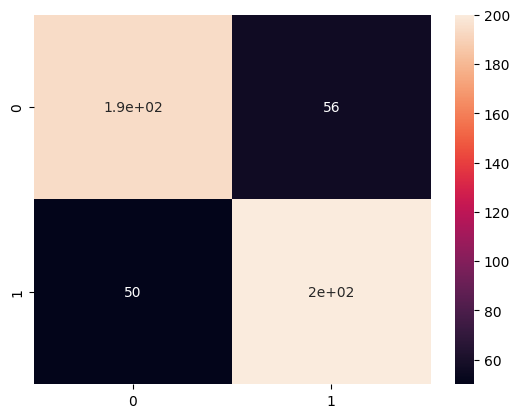

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
# prompt: import sklearn mean_square_error

from sklearn.metrics import mean_squared_error
